In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyactlike

# Example for Cobaya (version < 2.1)

This example demonstrates how to use the ACT likelihood on versions of Cobaya less than 2.1, such as the current stable release.

In [3]:
# Test the Cobaya interface to the ACT likelihood.
from cobaya.yaml import yaml_load
from cobaya.model import get_model

# need to define a wrapper for this external likelihood and ask for C_ell
like = pyactlike.ACTPowerSpectrumData()
def external_act_like(yp2=1.0, 
        _theory={'Cl': {
            'tt': like.tt_lmax, 
            'te': like.tt_lmax, 
            'ee': like.tt_lmax
        }}, 
        _derived={}):
    Cls = _theory.get_Cl(ell_factor=True)
    return like.loglike(
        Cls['tt'][2: like.tt_lmax+1], 
        Cls['te'][2: like.tt_lmax+1], 
        Cls['ee'][2: like.tt_lmax+1], yp2)

# set up our model
info = {
    'likelihood': {'act': external_act_like},
    'theory': {'camb': {'stop_at_error': True}},
    'params': {
        'ns': {
            'prior': {
                'min': 0.8,
                'max': 1.2
            },
            'ref': {
                'dist': 'norm',
                'loc': 1.014,
                'scale': 0.005
            },
            'proposal': 0.006,
            'latex': r'n_\mathrm{s}'
        },
        'H0': {
            'prior': {
                'min': 40,
                'max': 100
            },
            'ref': {
                'dist': 'norm',
                'loc': 67.4,
                'scale': 0.25
            },
            'proposal': 1,
            'latex': 'H_0'
        },
        'yp2':{
            'prior': {
                'min': 0.9,
                'max': 1.1
            },
            'ref': {
                'dist': 'norm',
                'loc': 1.01,
                'scale': 0.005
            }
        },
        
        # parameters not varied
        'As': 2.1e-09,
        'mnu': 0.06,
        'nnu': 3.046,
        'num_massive_neutrinos': 1,
        'ombh2': 0.022,
        'omch2': 0.12,
        'tau': 0.07
    },
    
    'sampler': {
        'mcmc': {
            'proposal_scale': 2.4
        }
    },
    'force': True,

## Uncomment this to save the chains. Make sure to change the directory!
#     'output': '/tigress/zequnl/cmb/data/cobaya_chains/stable_example'
}
model = get_model(info)

[model] *WARNING* Ignored blocks/options: ['sampler', 'force']
[act] Initialised external likelihood.
[camb] Importing *global* CAMB.
[likelihood] The theory code will compute the following products, requested by the likelihoods: ['Cl']


In [4]:
fiducial_params = {
    'ns': 0.97,
    'H0': 68.0,
    'yp2':1.0
}

In [5]:
model.loglike(fiducial_params)[0]

-188.21785329683718

In [6]:
from cobaya.run import run
updated_info, products = run(info)

[act] Initialised external likelihood.
[camb] Importing *global* CAMB.
[likelihood] The theory code will compute the following products, requested by the likelihoods: ['Cl']
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial point:
[mcmc] 
 weight  minuslogpost        ns         H0       yp2  minuslogprior  minuslogprior__0        chi2   chi2__act
    1.0    146.444445  1.014134  67.291565  1.006221       1.568616          1.568616  289.751658  289.751658
[mcmc] Sampling! (NB: nothing will be printed until 60 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 60 accepted steps.
[mcmc] Checkpoint: 120 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Convergence of means: R-1 = 1.036254 after 120 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 240 samples accepted.
[mcmc] Ready to check convergence and l

[mcmc] Checkpoint: 4080 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Convergence of means: R-1 = 0.016447 after 4080 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4200 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Convergence of means: R-1 = 0.007406 after 4200 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4320 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Convergence of means: R-1 = 0.004567 after 4320 accepted steps
[mcmc] Convergence of bounds: R-1 = 0.107394 after 4320 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 4320 accepted steps.


[root] *WARNING* outlier fraction 0.005459770114942529 
Mean:
[ 1.01459246 67.39932402  1.00769731]
Covariance matrix:
[[ 3.01083132e-05  2.79317190e-04 -8.30997219e-07]
 [ 2.79317190e-04  5.00045357e-02 -1.57773613e-05]
 [-8.30997219e-07 -1.57773613e-05  1.93730853e-05]]


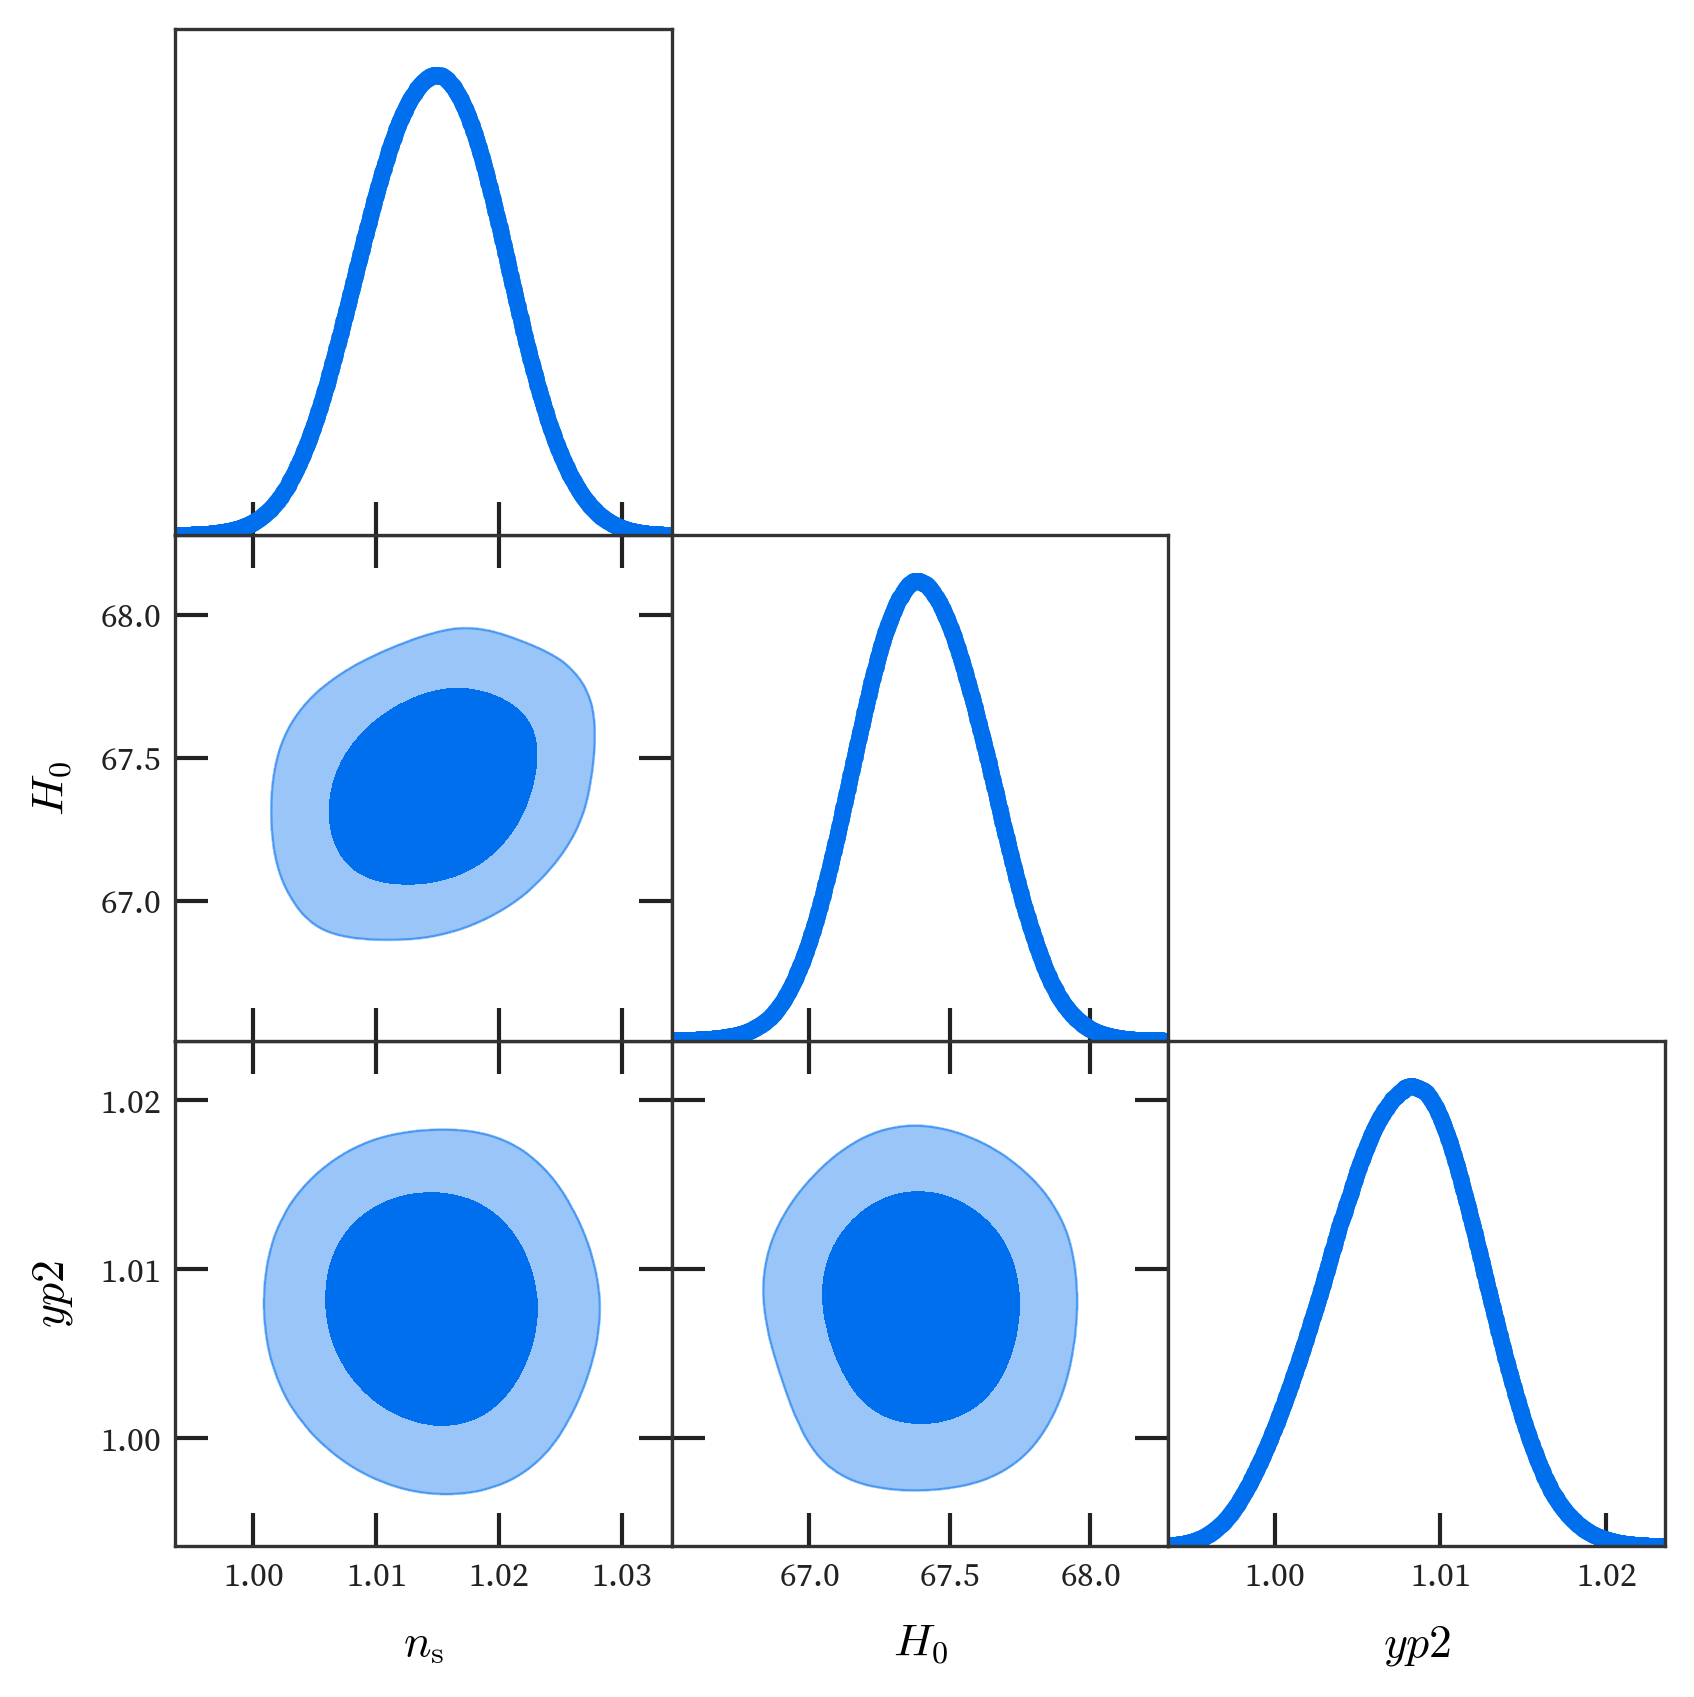

In [23]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, products["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:3]
covmat = gd_sample.getCovMat().matrix[:3, :3]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
# %matplotlib inline  # uncomment if running from the Jupyter notebook
import getdist.plots as gdplt

gdplot = gdplt.getSubplotPlotter()
gdplot.triangle_plot(gd_sample, ["ns", "H0", "yp2"], filled=True)

In [2]:
import numpy as np

In [3]:
x = np.array([[ 3.01083132e-05,  2.79317190e-04, -8.30997219e-07],
 [ 2.79317190e-04,  5.00045357e-02, -1.57773613e-05],
 [-8.30997219e-07, -1.57773613e-05,  1.93730853e-05]])

In [5]:
np.sqrt(np.diag(x))

array([0.0054871 , 0.22361694, 0.00440149])